In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [6]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
import seaborn as sns

In [49]:
pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [50]:
df = pd.read_csv(r"C:\Users\siva srinivas\Downloads\Machine Learning\Copy of superstore_sales(1).csv")

In [51]:
df

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Base Margin,Ship Date
0,3,13-10-2010,Low,6,261.54,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,0.80,20-10-2010
1,293,01-10-2012,High,49,10123.02,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,0.58,02-10-2012
2,293,01-10-2012,High,27,244.57,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,0.39,03-10-2012
3,483,10-07-2011,High,30,4965.76,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,0.58,12-07-2011
4,515,28-08-2010,Not Specified,19,394.27,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,0.50,30-08-2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,55558,09-08-2010,Medium,8,1294.04,0.05,Delivery Truck,-323.18,150.98,66.27,Mick Brown,Alberta,West,Consumer,Furniture,Bookcases,0.65,09-08-2010
8395,55558,09-08-2010,Medium,23,392.57,0.04,Regular Air,22.25,17.07,8.13,Mick Brown,Alberta,West,Consumer,Office Supplies,Envelopes,0.38,11-08-2010
8396,56550,08-04-2011,Not Specified,37,823.78,0.03,Express Air,343.05,22.23,5.08,Frank Hawley,Alberta,West,Home Office,Furniture,Office Furnishings,0.41,10-04-2011
8397,56550,08-04-2011,Not Specified,8,469.84,0.00,Regular Air,-159.24,65.99,8.99,Frank Hawley,Alberta,West,Home Office,Technology,Telephones and Communication,0.56,09-04-2011


In [52]:
df.isnull().sum()

Order ID                 0
Order Date               0
Order Priority           0
Order Quantity           0
Sales                    0
Discount                 0
Ship Mode                0
Profit                   0
Unit Price               0
Shipping Cost            0
Customer Name            0
Province                 0
Region                   0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Base Margin     63
Ship Date                0
dtype: int64

In [53]:
df['Product Base Margin'] = df['Product Base Margin'].fillna(0)

In [54]:
df['Product Base Margin'].head(10)

0   0.80
1   0.58
2   0.39
3   0.58
4   0.50
5   0.37
6   0.38
7   0.00
8   0.00
9   0.38
Name: Product Base Margin, dtype: float64

# Build the Linear Regression Model

In [55]:
df1 = df.copy()

#Create X and Y data Metrics

In [56]:
Y = df1['Sales']

In [57]:
X = df1[['Order Quantity','Discount','Profit','Unit Price']]

In [58]:
X.shape, Y.shape

((8399, 4), (8399,))

# Data Split: Train and Test the data

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [61]:
X_train.shape, Y_train.shape

((6719, 4), (6719,))

In [62]:
X_test.shape, Y_test.shape

((1680, 4), (1680,))

#  Linear Regression Model

In [63]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

# Predection the model

In [65]:
Y_pred = model.predict(X_test)
Y_pred

array([  659.79880036,  1369.14235075,  2294.98388812, ...,
         989.99673204, 13507.40517016,  1393.32927809])

Text(0.5, 1.0, 'Actual Sales vs Predicted Sales')

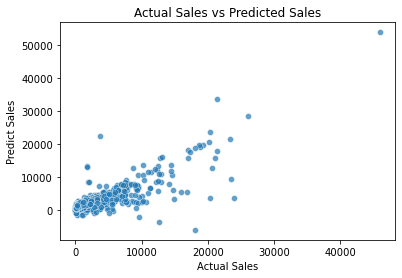

In [67]:
ax = sns.scatterplot(x=Y_test, y=Y_pred, alpha = 0.7)
ax.set_xlabel("Actual Sales")
ax.set_ylabel("Predict Sales")
ax.set_title("Actual Sales vs Predicted Sales")

Text(0.5, 1.0, 'Actual Sales vs Predicted Sales')

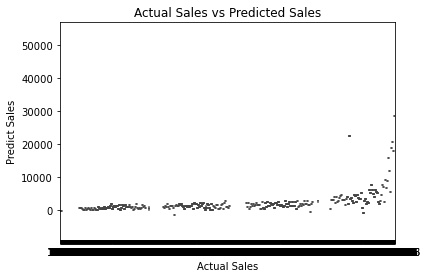

In [70]:
ax = sns.boxplot(x=Y_test, y=Y_pred)
ax.set_xlabel("Actual Sales")
ax.set_ylabel("Predict Sales")
ax.set_title("Actual Sales vs Predicted Sales")

Text(0.5, 1.0, 'Actual Sales vs Predicted Sales')

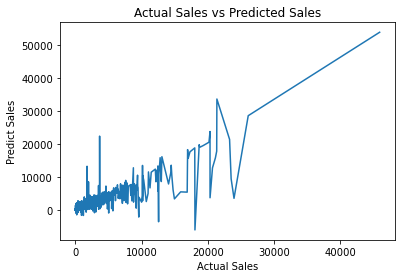

In [73]:
ax = sns.lineplot(x=Y_test, y=Y_pred)
ax.set_xlabel("Actual Sales")
ax.set_ylabel("Predict Sales")
ax.set_title("Actual Sales vs Predicted Sales")